In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
#from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
df_new = pd.read_csv('flights.csv', low_memory=False)

In [ ]:
print('Dataframe dimensions:', df_new.shape)

In [ ]:
tab_info=pd.DataFrame(df_new.dtypes).T.rename(index={0:'column type'})


In [ ]:
tab_info=tab_info.append(pd.DataFrame(df_new.isnull().sum()).T.rename(index={0:'null values (nb)'}))


In [ ]:
tab_info=tab_info.append(pd.DataFrame(df_new.isnull().sum()/df_new.shape[0]*100).T.rename(index={0:'null values (%)'}))


In [ ]:
airports = pd.read_csv("airports.csv")
#airports

In [ ]:
df_new = df_new[df_new['MONTH'] == 1]
df_new.head()

In [ ]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'MONTH','DAY','DAY_OF_WEEK', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']

In [ ]:
df_new.drop(variables_to_remove, axis = 1, inplace = True)


In [ ]:
df_new = df_new[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]

In [ ]:
df_new[:5]
#print(df_new.info())

#  Encoding String into Number

In [ ]:
 
from sklearn.preprocessing import LabelEncoder
number= LabelEncoder()
df_new['AIRLINE']=number.fit_transform(df_new['AIRLINE'].astype('str'))
df_new['ORIGIN_AIRPORT']=number.fit_transform(df_new['ORIGIN_AIRPORT'].astype('str'))
df_new['DESTINATION_AIRPORT']=number.fit_transform(df_new['DESTINATION_AIRPORT'].astype('str'))

#test['Name']=number.fit_transform(test['Name'].astype('str'))
df_new

In [1]:
import time
import numpy as np
import os
from keras import layers, models, callbacks, regularizers, optimizers
from keras.layers import advanced_activations
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler as ms
import pandas as pd
import numpy as np
import numpy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import os
import glob
import datetime as dt
import seaborn as sns

/home/student/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from datetime import timedelta
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from keras.callbacks import Callback
from keras.optimizers import adagrad, adam
from IPython.display import clear_output
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [37]:
df = pd.read_csv('flights_new.csv')

In [38]:
df.shape

(469968, 12)

In [39]:
df=df.dropna()

In [40]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

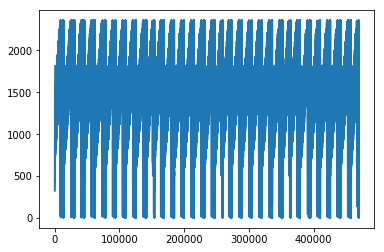

In [41]:
plt.plot(df['SCHEDULED_ARRIVAL'])

In [42]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [43]:
Y=df['ARRIVAL_DELAY']
df.drop(['ARRIVAL_DELAY'], axis = 1, inplace = True)


In [44]:
df=df.dropna()

In [45]:
df.shape


(457013, 10)

In [46]:
X=df.values

In [47]:
X1=scaler.fit_transform(X)

In [48]:
Y=np.asarray(Y)
Y=Y.reshape(-1,1)

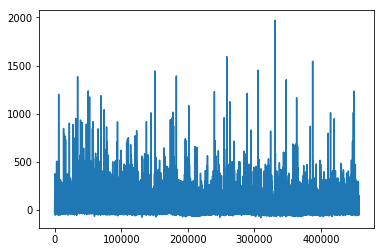

In [49]:
plt.plot(Y)

In [141]:
Y1=scaler.fit_transform(Y)

In [142]:
Y1

array([[0.02922552],
       [0.03555772],
       [0.04237701],
       ...,
       [0.05114467],
       [0.05406722],
       [0.04091573]])

In [51]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

In [52]:
diff1 = difference(Y1, 1)
diffx1 = difference(X1, 1)

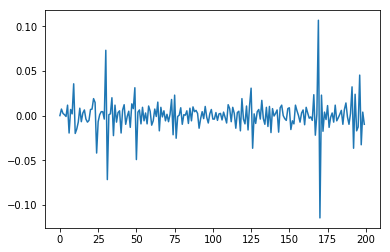

In [53]:
plt.plot(diff1[1000:1200])

In [54]:
diffx1=np.asarray(diffx1)
diff1=np.asarray(diff1)
diff1=diff1.reshape(-1,1)

In [55]:
values1=np.concatenate((diffx1, diff1), axis=1)

In [56]:
def series_to_supervised(data, n_in, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [57]:
reframed1=series_to_supervised(values1,1 , 1)

In [30]:
reframed1

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t)
1,-0.076923,0.064309,-0.147910,0.002124,-0.980409,0.001473,0.135708,0.138808,0.107914,0.120226,...,0.360129,0.414791,0.004248,0.006669,0.002947,0.023749,0.029179,0.008633,0.019802,0.006819
2,0.230769,0.360129,0.414791,0.004248,0.006669,0.002947,0.023749,0.029179,0.008633,0.019802,...,-0.360129,-0.527331,0.000000,-0.001251,-0.001473,-0.000424,-0.022926,-0.001439,-0.016973,-0.006819
3,-0.230769,-0.360129,-0.527331,0.000000,-0.001251,-0.001473,-0.000424,-0.022926,-0.001439,-0.016973,...,0.356913,-0.160772,0.002124,0.003752,0.001965,-0.205683,-0.207170,-0.071942,-0.093352,-0.005845
4,0.076923,0.356913,-0.160772,0.002124,0.003752,0.001965,-0.205683,-0.207170,-0.071942,-0.093352,...,0.003215,0.209003,0.000000,-0.001667,-0.001965,0.119593,0.146311,-0.025899,0.021216,0.014126
5,0.461538,0.003215,0.209003,0.000000,-0.001667,-0.001965,0.119593,0.146311,-0.025899,0.021216,...,-0.366559,0.000000,0.000000,-0.000417,-0.000491,-0.032231,-0.042101,-0.051799,-0.084866,-0.012177
6,0.384615,-0.366559,0.000000,0.000000,-0.000417,-0.000491,-0.032231,-0.042101,-0.051799,-0.084866,...,0.006431,0.479100,0.002124,0.010421,0.009823,0.117472,0.101709,0.132374,0.111740,0.003410
7,-0.692308,0.006431,0.479100,0.002124,0.010421,0.009823,0.117472,0.101709,0.132374,0.111740,...,0.360129,0.070740,0.000000,-0.010421,-0.012279,-0.109415,-0.092122,-0.112230,-0.079208,-0.001461
8,-0.230769,0.360129,0.070740,0.000000,-0.010421,-0.012279,-0.109415,-0.092122,-0.112230,-0.079208,...,-0.366559,-0.652733,0.000000,0.005836,0.006876,0.070399,0.051688,0.037410,0.014144,-0.000974
9,0.538462,-0.366559,-0.652733,0.000000,0.005836,0.006876,0.070399,0.051688,0.037410,0.014144,...,0.697749,0.000000,0.000000,-0.003752,-0.004420,-0.079729,-0.084619,-0.069065,-0.076379,-0.007306
10,0.000000,0.697749,0.000000,0.000000,-0.003752,-0.004420,-0.079729,-0.084619,-0.069065,-0.076379,...,-0.697749,0.054662,0.002124,0.001251,-0.000982,0.118745,0.125052,0.136691,0.165488,0.009742


In [58]:
reframed1.shape

(457011, 22)

In [59]:
reframed1.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)', 'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)'],
      dtype='object')

In [60]:
reframed1.drop(reframed1.columns[[11,12,13,14,15,16,17,18,19]], axis=1, inplace=True)

In [61]:
reframed3=np.asarray(reframed1)

In [62]:
reframed3.shape

(457011, 13)

In [63]:
train1 = reframed3[:365608, :]
test1 = reframed3[365608:, :]


In [64]:
train_X1, train_y1 = train1[:, :-1], train1[:, -1]
test_X1, test_y1 = test1[:, :-1], test1[:, -1]

In [65]:
train_X1.shape

(365608, 12)

In [66]:
test_X1.shape


(91403, 12)

In [67]:
train_X1 = train_X1.reshape((365608, 1, 12))
test_X1  =test_X1.reshape(91403,1,12)

In [68]:
from keras.layers import Bidirectional
from keras.layers import Dense, Dropout

In [122]:
seed = 1
np.random.seed(seed)

In [124]:
model1 = Sequential()
    model1.add((LSTM(12, input_shape=(train_X1.shape[1], train_X1.shape[2]),kernel_regularizer=regularizers.l2(0.0001),return_sequences=False)))
model1.add(Dropout(0.5))
#model1.add(Bidirectional(LSTM(50, input_shape=(train_X1.shape[1], train_X1.shape[2]),return_sequences=False,kernel_regularizer=regularizers.l1(0.0001))))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='mse', optimizer='adam',metrics=['mae'])
history1=model1.fit(train_X1, train_y1, epochs=50, batch_size=8,validation_data=(test_X1, test_y1), verbose=2,shuffle=False)

Train on 365608 samples, validate on 91403 samples
Epoch 1/50
 - 44s - loss: 0.0023 - mean_absolute_error: 0.0201 - val_loss: 4.3960e-04 - val_mean_absolute_error: 0.0116
Epoch 2/50
 - 44s - loss: 7.0813e-04 - mean_absolute_error: 0.0145 - val_loss: 4.3960e-04 - val_mean_absolute_error: 0.0116
Epoch 3/50
 - 44s - loss: 7.0774e-04 - mean_absolute_error: 0.0145 - val_loss: 4.3960e-04 - val_mean_absolute_error: 0.0116
Epoch 4/50
 - 44s - loss: 7.0771e-04 - mean_absolute_error: 0.0145 - val_loss: 4.3960e-04 - val_mean_absolute_error: 0.0116
Epoch 5/50
 - 44s - loss: 7.0770e-04 - mean_absolute_error: 0.0145 - val_loss: 4.3960e-04 - val_mean_absolute_error: 0.0116
Epoch 6/50
 - 44s - loss: 7.0771e-04 - mean_absolute_error: 0.0145 - val_loss: 4.3960e-04 - val_mean_absolute_error: 0.0116
Epoch 7/50
 - 45s - loss: 7.0771e-04 - mean_absolute_error: 0.0145 - val_loss: 4.3960e-04 - val_mean_absolute_error: 0.0116
Epoch 8/50
 - 44s - loss: 7.0770e-04 - mean_absolute_error: 0.0145 - val_loss: 4.3960

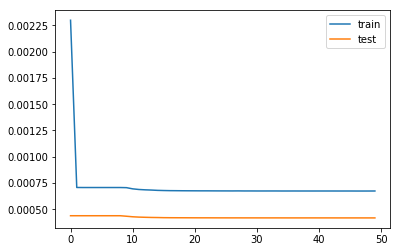

In [125]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.show()

In [134]:
trainPredict1 = model1.predict(train_X1)
testPredict1 = model1.predict(test_X1)

In [135]:
pred1=np.concatenate((trainPredict1, testPredict1), axis=0)

In [139]:
pred1

array([[9.5623625e-16],
       [2.8269846e-04],
       [5.6992564e-03],
       ...,
       [1.6325884e-03],
       [9.2403417e-16],
       [2.4745254e-36]], dtype=float32)

In [143]:
Y1

array([[0.02922552],
       [0.03555772],
       [0.04237701],
       ...,
       [0.05114467],
       [0.05406722],
       [0.04091573]])

In [144]:
def inverse_difference(last_ob, value):
	return value + last_ob
inverted1 = [inverse_difference(Y1[i], pred1[i]) for i in range(len(pred1))]

In [150]:
inverted1

array([[0.02922552],
       [0.03584042],
       [0.04807627],
       ...,
       [0.0313452 ],
       [0.03360935],
       [0.05114467]])

In [145]:
inverted1=np.asarray(inverted1)

In [146]:
inverted1

array([[0.02922552],
       [0.03584042],
       [0.04807627],
       ...,
       [0.0313452 ],
       [0.03360935],
       [0.05114467]])

In [147]:
inverted1=inverted1.reshape(457011,1)

In [148]:
pre1=scaler.inverse_transform(inverted1)

In [149]:
pre1

array([[-22.        ],
       [ -8.41962007],
       [ 16.70057346],
       ...,
       [-17.64829591],
       [-13.        ],
       [ 23.        ]])

In [151]:
pre1.shape

(457011, 1)

In [152]:
pre1=pre1.reshape(457011)

In [153]:
dff=pd.DataFrame()

In [117]:
Y.shape

(457013, 1)

In [154]:
Y1=Y.reshape(457013)

In [155]:
dff['actual']=Y1[0:457011]

In [156]:
dff['pred']=pre1

In [157]:
dff

,actual,pred
0,-22.0,-22.000000
1,-9.0,-8.419620
2,5.0,16.700573
3,-9.0,2.663541
4,-21.0,-20.963555
5,8.0,25.095876
6,-17.0,-16.538447
7,-10.0,-7.176062
8,-13.0,-7.377110
9,-15.0,-0.081483


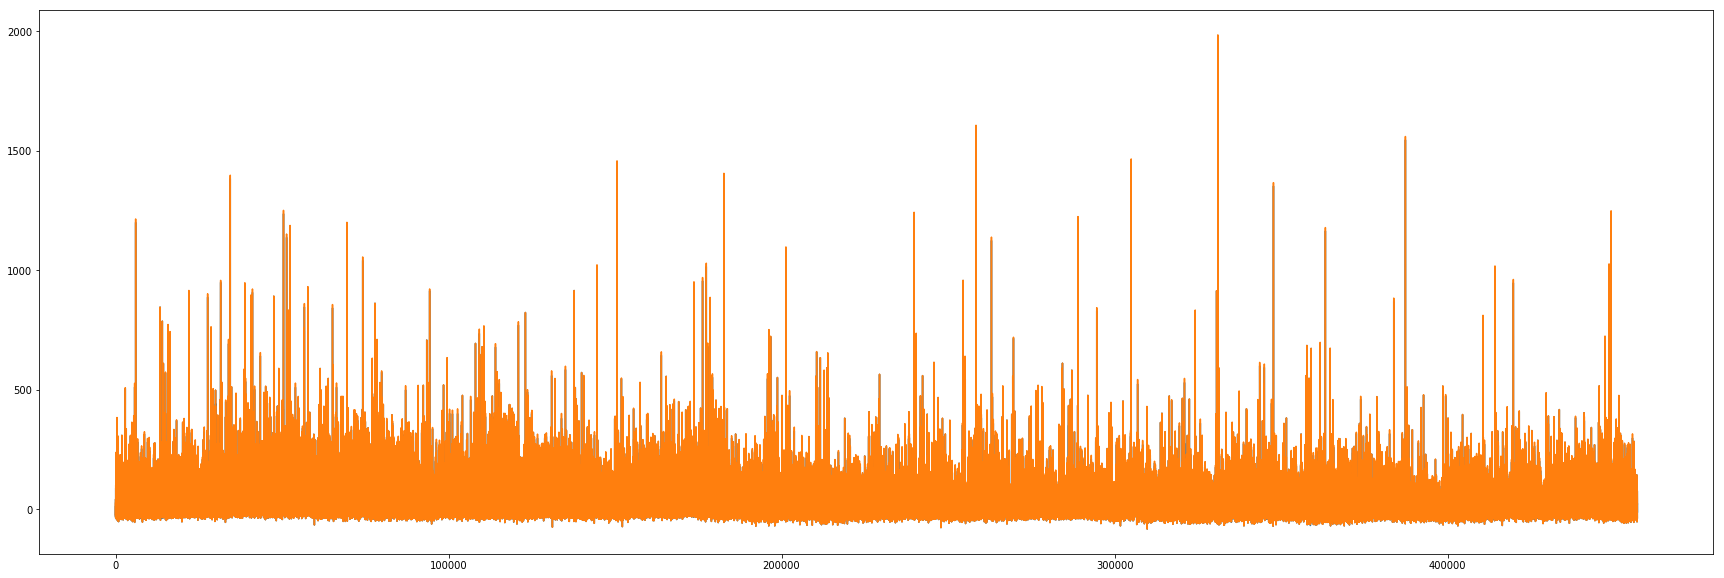

In [158]:
plt.figure(figsize=[30,10])
plt.plot(dff['actual'])
plt.plot(dff['pred'])

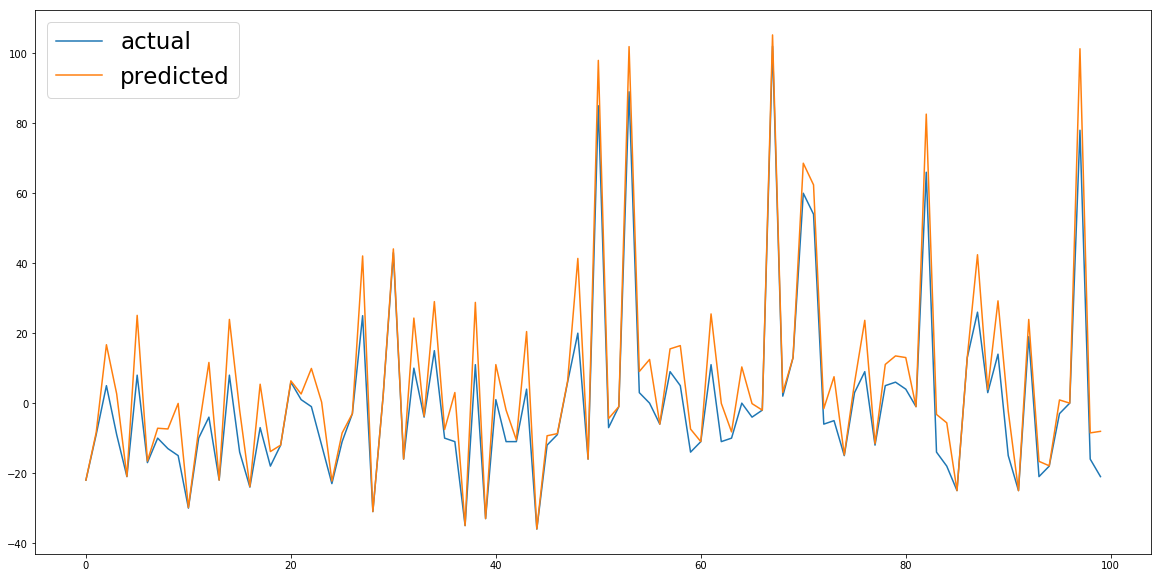

In [159]:
plt.figure(figsize=[20,10])
plt.plot(dff['actual'][0:100],label='actual')
plt.plot(dff['pred'][0:100],label='predicted')
plt.legend(loc=2,fontsize=23 )
plt.show()

In [160]:
rmse = math.sqrt(mean_squared_error(dff['actual'], dff['pred']))

In [161]:
rmse

9.294581033797535

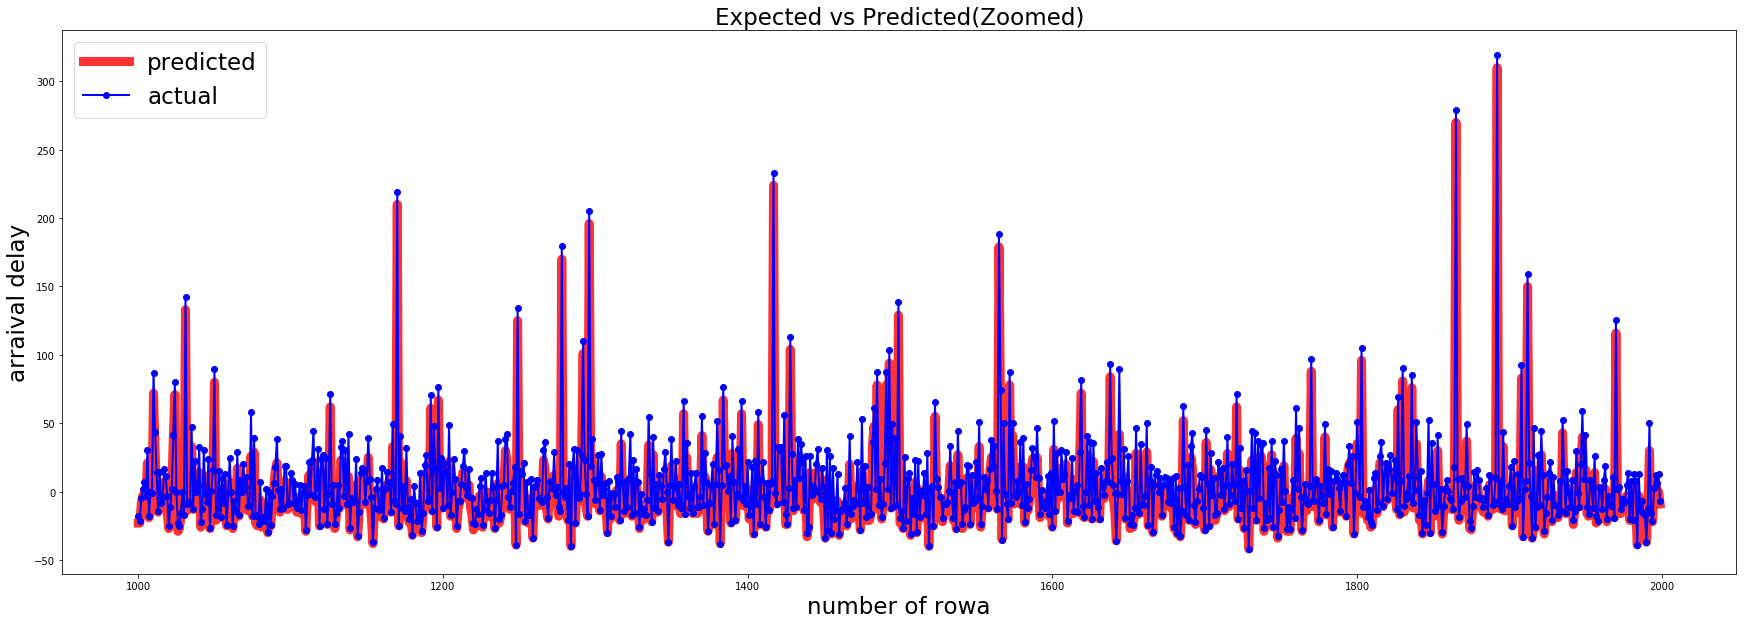

In [81]:
plt.figure(figsize=[30,10])
plt.plot(dff['actual'][1000:2000],alpha=0.8,color='r',label='predicted',linewidth=9.0)
plt.plot(dff['pred'][1000:2000],marker='o',color='Blue',label='actual',linewidth=2.0)
plt.xlabel("number of rows",fontsize=23)
plt.ylabel("arraival delay",fontsize=23)
plt.legend(loc=2,fontsize=23 )
plt.title('Expected vs Predicted(Zoomed)',fontsize=23)

plt.show()